In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Data
scada_df = pd.read_excel("wtg_scada_dataset.xlsx", sheet_name="wtg_scada_dataset")
wo_df = pd.read_excel("WTG_SAP WO_Dataset.xlsx")

In [3]:
wo_df

,Created on,Basic start date,Basic finish date,Order,Order Type,Priority text,System status,User Status,Description,Functional Location,Description of functional location,Total planned costs
0,2025-03-05,2025-04-04,2025-06-03,80443104,YR02,Within 3 months,CRTD ACAS MACM PRC,CRTD,Replace spinner hatch seal,WOW03H05,Wind Turbine H05_MHIV V164 MK1A 8.0,1395.12
1,2025-03-04,2025-03-06,2025-03-06,80442932,YR02,Within 1 month,REL ACAS MSPT PRC,REPL EXSC PPMA,Brake Switch,WOW03A03,Wind Turbine A03_MHIV V164 MK1A 8.0,2029.66
2,2025-03-04,2025-03-10,2025-04-02,80443000,YR02,Within 1 month,REL ACAS NMAT PRC,REPL,Replace SRL pull down rope,WOW03B03,Wind Turbine B03_MHIV V164 MK1A 8.0,1980.00
3,2025-03-04,2025-03-13,2025-04-03,80443090,YR02,Within 1 month,REL ACAS NMAT PRC,REPL,WOW4 ONS -Rob Dale Scopes 13th March,WOW03X01,Onshore Substation =X01,7590.00
4,2025-03-03,2025-03-06,2025-03-06,80442574,YR02,Immediately,REL ACAS NMAT PRC,RERP EXSC,"MSI ExtHighI Info X M 1, L 2",WOW03F03,Wind Turbine F03_MHIV V164 MK1A 8.0,3960.00
...,...,...,...,...,...,...,...,...,...,...,...,...
788,2022-05-27,2025-04-07,2025-04-13,80295599,YR02,Within three months,CRTD ACAS CSER MACM PRC,CRTD,TP tetra battries require replacing,WOW03D03YAB01UH002,UPS_Panel,0.00
789,2022-04-28,2025-09-08,2025-09-14,80291698,YR02,Within two months,REL ACAS CSER MACM PRC,RERP,Davit top cover requires replacing,WOW03H05XMM80GM001-UM001,Crane Unit (Main Boom & Pedestall),3118.99
790,2022-04-24,2025-06-02,2025-06-08,80291098,YR02,Within three months,REL ACAS CSER MACM PRC,RERP,Davit top cover requires replacing,WOW03G03XMM80GM001-UM001,Crane Unit (Main Boom & Pedestall),3118.99
791,2021-03-08,2025-07-07,2025-07-13,80251472,YR02,Within two months,REL ACAS NMAT PRC,RERP,Davit Pendant Repair,WOW03E02UMD80,Transition Piece_TP,2640.00


In [4]:
wo_df.describe()

,Order,Total planned costs
count,7.930000e+02,793.000000
mean,8.039757e+07,13986.302308
std,3.729229e+04,33173.768714
min,8.023594e+07,0.000000
25%,8.037497e+07,113.290000
50%,8.039881e+07,2016.020000
75%,8.042972e+07,9483.380000
max,8.044310e+07,323266.640000


In [5]:
wo_df.isnull().sum()

Created on                            0
Basic start date                      0
Basic finish date                     0
Order                                 0
Order Type                            0
Priority text                         5
System status                         0
User Status                           0
Description                           0
Functional Location                   0
Description of functional location    0
Total planned costs                   0
dtype: int64

In [6]:
wo_df.describe(include='all').T

C:\Users\chinmay\AppData\Local\Temp\ipykernel_10396\2699018485.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  wo_df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Created on,793,295,2025-02-17 00:00:00,42,2020-10-02,2025-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Basic start date,793,65,2025-06-23 00:00:00,43,2023-12-06,2026-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Basic finish date,793,68,2025-06-29 00:00:00,43,2023-12-12,2026-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order,793.0,NaN,NaN,NaN,NaT,NaT,80397571.779319,37292.288163,80235942.0,80374973.0,80398808.0,80429725.0,80443104.0
Order Type,793,1,YR02,793,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Priority text,788,8,Within 3 months,276,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
System status,793,27,CRTD ACAS NMAT PRC,112,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
User Status,793,16,RERP,342,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,793,494,Remove nitrogen bottles from nac,40,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Functional Location,793,201,WOW03C01,26,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
wo_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
788    False
789    False
790    False
791    False
792    False
Length: 793, dtype: bool

C:\Users\chinmay\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


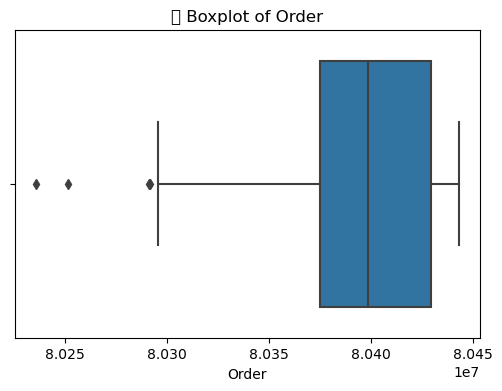

C:\Users\chinmay\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


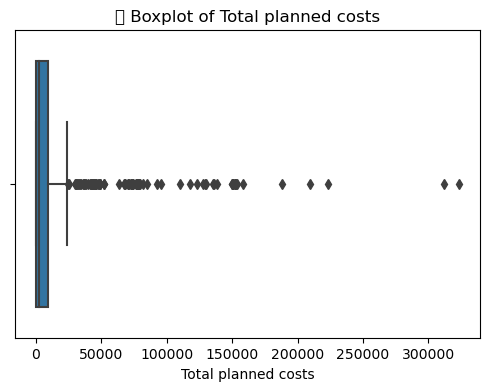

In [8]:
# Boxplots for outlier detection
num_cols = wo_df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=wo_df[col])
    plt.title(f'📦 Boxplot of {col}')
    plt.show()


C:\Users\chinmay\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


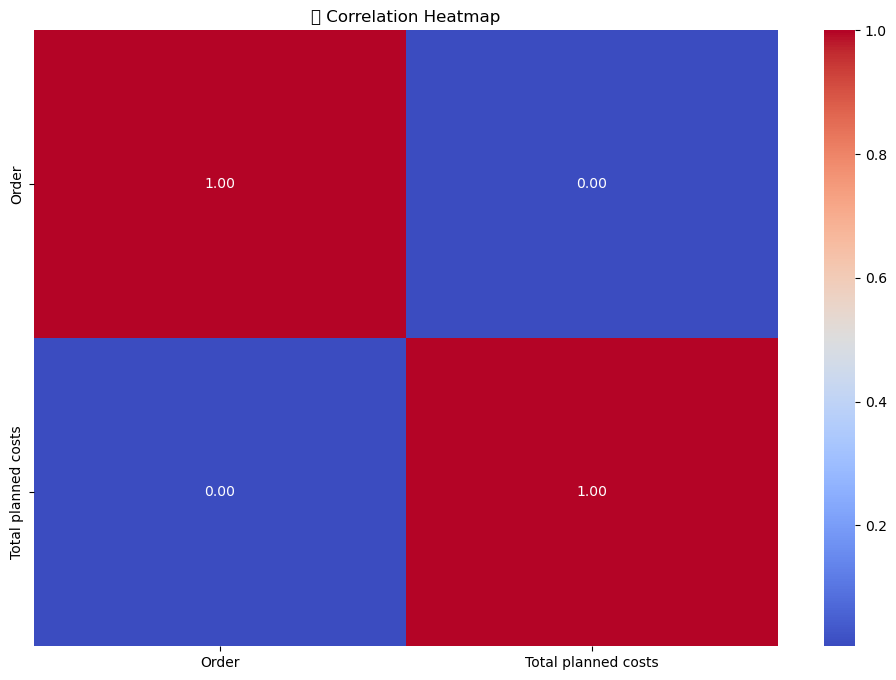

In [9]:
# Correlation heatmap (numerical features)
plt.figure(figsize=(12, 8))
sns.heatmap(wo_df.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('🔗 Correlation Heatmap')
plt.show()

In [10]:
scada_df.isnull().sum()

timestamp                 0
turbine_id                0
gearbox_temperature_C     0
nacelle_temperature_C     0
hydraulic_pressure_bar    0
cooling_pressure_bar      0
dtype: int64

In [11]:
# ===============================
# 1. SCADA Risk Score Calculation
# ===============================

# Preprocess SCADA
scada_df['timestamp'] = pd.to_datetime(scada_df['timestamp'])

In [12]:
scada_df['timestamp']

0       2025-03-15 00:00:00
1       2025-03-15 01:00:00
2       2025-03-15 02:00:00
3       2025-03-15 03:00:00
4       2025-03-15 04:00:00
                ...        
29515   2025-04-13 19:00:00
29516   2025-04-13 20:00:00
29517   2025-04-13 21:00:00
29518   2025-04-13 22:00:00
29519   2025-04-13 23:00:00
Name: timestamp, Length: 29520, dtype: datetime64[ns]

In [13]:
# Define thresholds
thresholds = {
    'gearbox_temperature_C': 75,
    'nacelle_temperature_C': 60,
    'hydraulic_pressure_bar': 250,
    'cooling_pressure_bar': 200
}


In [14]:
# Example: Check if any gearbox temperature exceeds the threshold
if (scada_df['gearbox_temperature_C'] > thresholds['gearbox_temperature_C']).any():
    print("At least one gearbox temperature exceeds the threshold!")

At least one gearbox temperature exceeds the threshold!


In [15]:
# Create threshold flags
for metric, limit in thresholds.items():
    scada_df[f'{metric}_flag'] = (scada_df[metric] > limit).astype(int)

In [16]:
  scada_df[f'{metric}_flag']

0        0
1        0
2        0
3        0
4        0
        ..
29515    0
29516    0
29517    0
29518    0
29519    0
Name: cooling_pressure_bar_flag, Length: 29520, dtype: int32

In [17]:
# Summarize threshold violations per turbine
scada_risk = scada_df.groupby('turbine_id')[
    [f'{metric}_flag' for metric in thresholds]
].sum().reset_index()

In [18]:
scada_risk

,turbine_id,gearbox_temperature_C_flag,nacelle_temperature_C_flag,hydraulic_pressure_bar_flag,cooling_pressure_bar_flag
0,WOW03A01,1,0,2,1
1,WOW03A02,2,0,6,1
2,WOW03A03,1,0,1,0
3,WOW03A04,0,0,2,0
4,WOW03A05,1,0,7,0
5,WOW03B01,0,0,7,0
6,WOW03B02,3,0,9,0
7,WOW03B03,1,0,3,0
8,WOW03B04,1,0,4,0
9,WOW03B05,0,0,6,0


In [19]:
# Total breach count
scada_risk['scada_risk_score_raw'] = scada_risk.drop(columns='turbine_id').sum(axis=1)

In [20]:
scada_risk['scada_risk_score_raw']

0      4
1      9
2      2
3      2
4      8
5      7
6     12
7      4
8      5
9      6
10     4
11     5
12     7
13     4
14     7
15     7
16     6
17     6
18     6
19     6
20     7
21     4
22     6
23     7
24     6
25     9
26    11
27     4
28     9
29     7
30     7
31     5
32    11
33     6
34     6
35    11
36     5
37     1
38     7
39     5
40     3
Name: scada_risk_score_raw, dtype: int64

In [21]:
# Normalize to 0–100
scada_risk['scada_risk_score'] = (
    scada_risk['scada_risk_score_raw'] / scada_risk['scada_risk_score_raw'].max()
) * 100

In [22]:
scada_risk['scada_risk_score']

0      33.333333
1      75.000000
2      16.666667
3      16.666667
4      66.666667
5      58.333333
6     100.000000
7      33.333333
8      41.666667
9      50.000000
10     33.333333
11     41.666667
12     58.333333
13     33.333333
14     58.333333
15     58.333333
16     50.000000
17     50.000000
18     50.000000
19     50.000000
20     58.333333
21     33.333333
22     50.000000
23     58.333333
24     50.000000
25     75.000000
26     91.666667
27     33.333333
28     75.000000
29     58.333333
30     58.333333
31     41.666667
32     91.666667
33     50.000000
34     50.000000
35     91.666667
36     41.666667
37      8.333333
38     58.333333
39     41.666667
40     25.000000
Name: scada_risk_score, dtype: float64

In [23]:
# ================================
# 2. Work Order (WO) Risk Scoring
# ================================

# Clean column names
wo_df.columns = [col.strip().lower().replace(" ", "_") for col in wo_df.columns]

In [24]:
wo_df.columns

Index(['created_on', 'basic_start_date', 'basic_finish_date', 'order',
       'order_type', 'priority_text', 'system_status', 'user_status',
       'description', 'functional_location',
       'description_of_functional_location', 'total_planned_costs'],
      dtype='object')

In [25]:
# Extract turbine ID
wo_df['turbine_id'] = wo_df['functional_location'].str.strip()

In [26]:
wo_df['turbine_id']

0                      WOW03H05
1                      WOW03A03
2                      WOW03B03
3                      WOW03X01
4                      WOW03F03
                 ...           
788          WOW03D03YAB01UH002
789    WOW03H05XMM80GM001-UM001
790    WOW03G03XMM80GM001-UM001
791               WOW03E02UMD80
792               WOW03C06XMM80
Name: turbine_id, Length: 793, dtype: object

In [27]:
# Priority mapping
priority_map = {
    'Immediately': 3,
    'Within 1 month': 2,
    'Within 3 months': 1
}
wo_df['priority_score'] = wo_df['priority_text'].map(priority_map).fillna(0)

In [28]:
wo_df['priority_score']

0      1.0
1      2.0
2      2.0
3      2.0
4      3.0
      ... 
788    0.0
789    0.0
790    0.0
791    0.0
792    0.0
Name: priority_score, Length: 793, dtype: float64

In [29]:
priority_map

{'Immediately': 3, 'Within 1 month': 2, 'Within 3 months': 1}

In [30]:
# Work order features
wo_summary = wo_df.groupby('turbine_id').agg(
    wo_count=('order', 'count'),
    avg_cost=('total_planned_costs', 'mean'),
    avg_priority=('priority_score', 'mean'),
    recurring_issues=('description', pd.Series.nunique)
).reset_index()

In [31]:
wo_summary

,turbine_id,wo_count,avg_cost,avg_priority,recurring_issues
0,WOW03A01,25,12836.820400,1.16,23
1,WOW03A01MDX01,1,1320.000000,1.00,1
2,WOW03A01XMM,1,0.000000,2.00,1
3,WOW03A02,14,9378.748571,1.00,14
4,WOW03A02MDA15,1,987.440000,2.00,1
...,...,...,...,...,...
196,WOW03Z03AAF11,1,0.000000,0.00,1
197,WOW03Z03AAF24,1,0.000000,0.00,1
198,WOW03Z03AAF24WA001-QB001,1,0.000000,2.00,1
199,WOW03Z03CAA01UH001-RB001,1,0.000000,1.00,1


In [32]:
# Normalize
for col in ['wo_count', 'avg_cost', 'avg_priority', 'recurring_issues']:
    max_val = wo_summary[col].max()
    wo_summary[f'{col}_norm'] = wo_summary[col] / max_val if max_val > 0 else 0

In [33]:
# Combined WO risk score (average of all normalized)
wo_summary['wo_risk_score_raw'] = wo_summary[
    ['wo_count_norm', 'avg_cost_norm', 'avg_priority_norm', 'recurring_issues_norm']
].mean(axis=1)
wo_summary['wo_risk_score'] = wo_summary['wo_risk_score_raw'] * 100

In [34]:
  wo_summary[f'{col}_norm']

0      0.884615
1      0.038462
2      0.038462
3      0.538462
4      0.038462
         ...   
196    0.038462
197    0.038462
198    0.038462
199    0.038462
200    0.038462
Name: recurring_issues_norm, Length: 201, dtype: float64

In [35]:
wo_summary['wo_risk_score']

0      56.813255
1      10.358493
2      18.589744
3      35.981721
4      18.666108
         ...    
196     1.923077
197     1.923077
198    18.589744
199    10.256410
200     1.923077
Name: wo_risk_score, Length: 201, dtype: float64

In [36]:

# ================================
# 3. Combine and Calculate HI Score
# ================================

# Merge datasets
combined = pd.merge(
    scada_risk[['turbine_id', 'scada_risk_score']],
    wo_summary[['turbine_id', 'wo_risk_score']],
    on='turbine_id',
    how='outer'
).fillna(0)

In [37]:
combined

,turbine_id,scada_risk_score,wo_risk_score
0,WOW03A01,33.333333,56.813255
1,WOW03A02,75.000000,35.981721
2,WOW03A03,16.666667,30.221836
3,WOW03A04,16.666667,33.635383
4,WOW03A05,66.666667,32.401302
...,...,...,...
197,WOW03Z03AAF11,0.000000,1.923077
198,WOW03Z03AAF24,0.000000,1.923077
199,WOW03Z03AAF24WA001-QB001,0.000000,18.589744
200,WOW03Z03CAA01UH001-RB001,0.000000,10.256410


In [38]:
# Health Index Score
combined['health_index_score'] = 100 - (
    0.5 * combined['scada_risk_score'] + 0.5 * combined['wo_risk_score']
)

In [39]:
combined['health_index_score']

0      54.926706
1      44.509140
2      76.555748
3      74.848975
4      50.466015
         ...    
197    99.038462
198    99.038462
199    90.705128
200    94.871795
201    99.038462
Name: health_index_score, Length: 202, dtype: float64

In [40]:
# Sort by health index
combined_sorted = combined.sort_values('health_index_score')

In [41]:
combined_sorted

,turbine_id,scada_risk_score,wo_risk_score,health_index_score
26,WOW03E04,91.666667,52.156333,28.088500
6,WOW03B02,100.000000,35.768185,32.115908
32,WOW03G01,91.666667,41.523963,33.404685
35,WOW03G04,91.666667,28.453201,39.940066
25,WOW03E03,75.000000,38.188145,43.405928
...,...,...,...,...
156,WOW03G01UMD80UM001-WS011,0.000000,1.923077,99.038462
160,WOW03G03AAF80,0.000000,1.923077,99.038462
166,WOW03G04MDA,0.000000,1.923077,99.038462
113,WOW03D03AAF80,0.000000,1.923077,99.038462


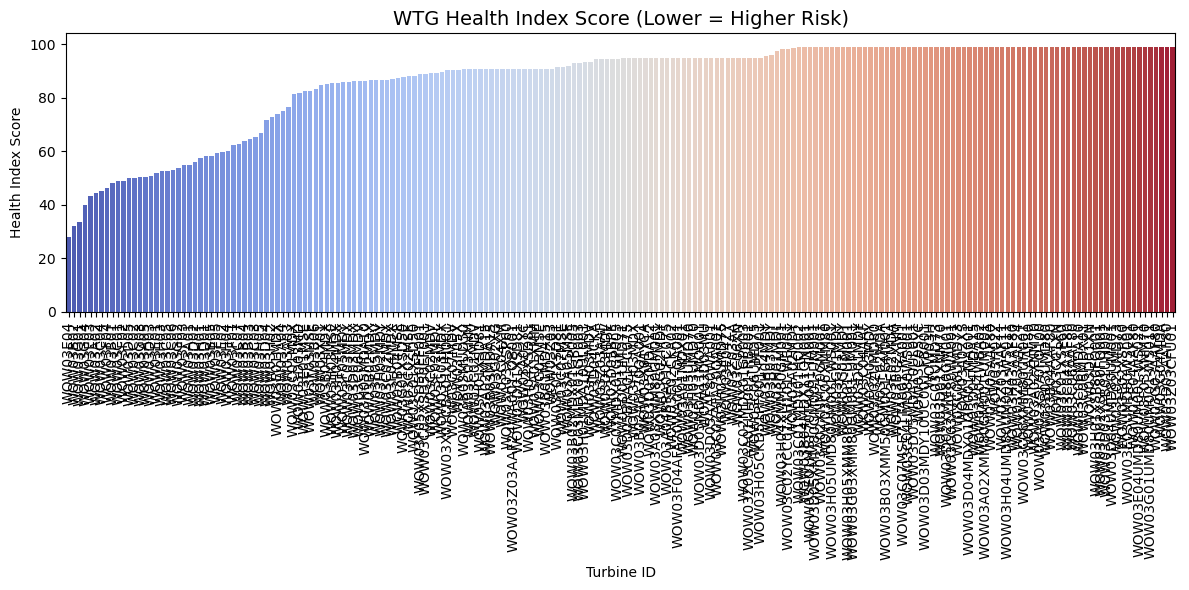

In [42]:

# ================================
# 4. Visualizations
# ================================

# Barplot of Health Index
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_sorted, x='turbine_id', y='health_index_score', palette='coolwarm')
plt.title('WTG Health Index Score (Lower = Higher Risk)', fontsize=14)
plt.xlabel('Turbine ID')
plt.ylabel('Health Index Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

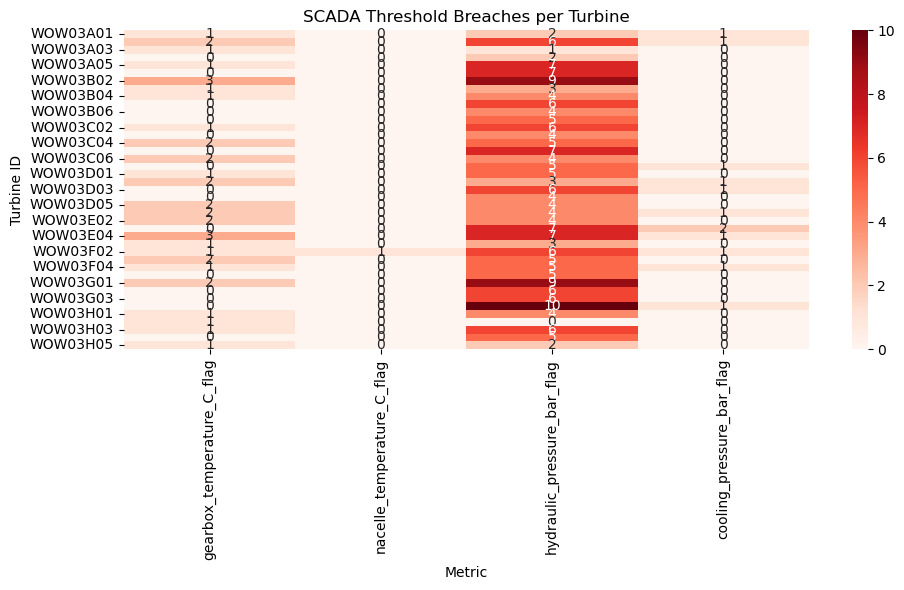

In [43]:
# Heatmap of SCADA risks
scada_heatmap = scada_risk.set_index('turbine_id')[
    [f'{metric}_flag' for metric in thresholds]
]

plt.figure(figsize=(10, 6))
sns.heatmap(scada_heatmap, cmap='Reds', annot=True, fmt='d')
plt.title('SCADA Threshold Breaches per Turbine')
plt.ylabel('Turbine ID')
plt.xlabel('Metric')
plt.tight_layout()
plt.show()

In [44]:
# Top 10 Risky Turbines
top_risky = combined_sorted.head(10)
print("🔺 Top 10 Most At-Risk WTGs (Lowest Health Index):")
print(top_risky[['turbine_id', 'scada_risk_score', 'wo_risk_score', 'health_index_score']])


🔺 Top 10 Most At-Risk WTGs (Lowest Health Index):
   turbine_id  scada_risk_score  wo_risk_score  health_index_score
26   WOW03E04         91.666667      52.156333           28.088500
6    WOW03B02        100.000000      35.768185           32.115908
32   WOW03G01         91.666667      41.523963           33.404685
35   WOW03G04         91.666667      28.453201           39.940066
25   WOW03E03         75.000000      38.188145           43.405928
1    WOW03A02         75.000000      35.981721           44.509140
14   WOW03C04         58.333333      51.786545           44.940061
30   WOW03F04         58.333333      49.313718           46.176474
5    WOW03B01         58.333333      45.830768           47.917949
11   WOW03C01         41.666667      60.478054           48.927640


In [45]:
top_risky

,turbine_id,scada_risk_score,wo_risk_score,health_index_score
26,WOW03E04,91.666667,52.156333,28.088500
6,WOW03B02,100.000000,35.768185,32.115908
32,WOW03G01,91.666667,41.523963,33.404685
35,WOW03G04,91.666667,28.453201,39.940066
25,WOW03E03,75.000000,38.188145,43.405928
1,WOW03A02,75.000000,35.981721,44.509140
14,WOW03C04,58.333333,51.786545,44.940061
30,WOW03F04,58.333333,49.313718,46.176474
5,WOW03B01,58.333333,45.830768,47.917949
11,WOW03C01,41.666667,60.478054,48.927640


In [46]:
# Ensure combined and combined_sorted are created
# If not already defined, recreate them here

# Sort combined scores for visualization
combined_sorted = combined.sort_values('health_index_score').reset_index(drop=True)

# Define top and bottom turbines for plots
top10 = combined_sorted.head(10)
bottom10 = combined_sorted.tail(10)

C:\Users\chinmay\AppData\Local\Temp\ipykernel_10396\2835192681.py:8: UserWarning: Glyph 128314 (\N{UP-POINTING RED TRIANGLE}) missing from current font.
  plt.tight_layout()
C:\Users\chinmay\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128314 (\N{UP-POINTING RED TRIANGLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


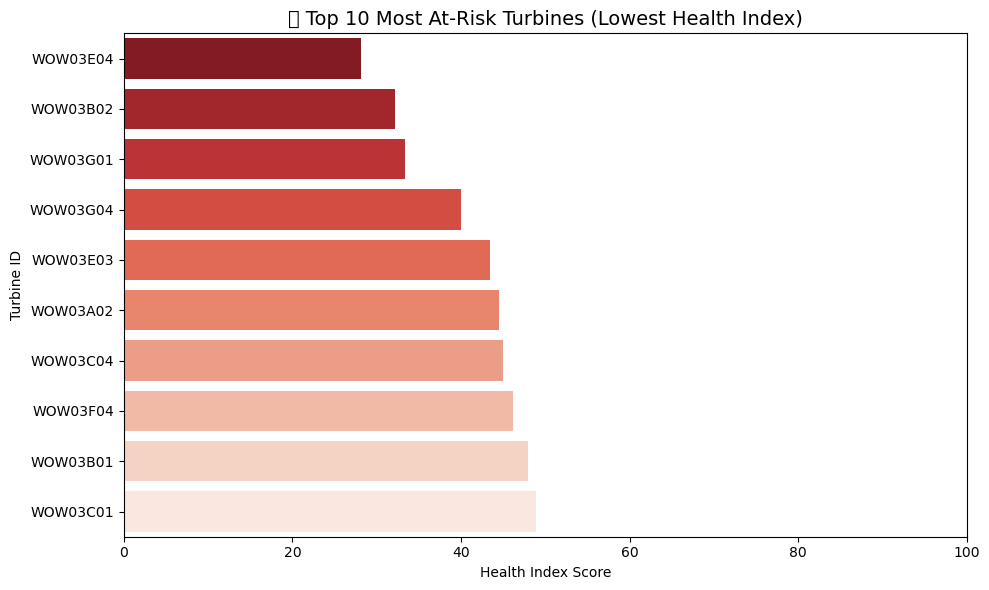

In [47]:
# Plot 1: Horizontal Barplot - Top 10 Risky Turbines
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, y='turbine_id', x='health_index_score', palette='Reds_r')
plt.title('🔺 Top 10 Most At-Risk Turbines (Lowest Health Index)', fontsize=14)
plt.xlabel('Health Index Score')
plt.ylabel('Turbine ID')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

C:\Users\chinmay\AppData\Local\Temp\ipykernel_10396\14481383.py:8: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  plt.tight_layout()
C:\Users\chinmay\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


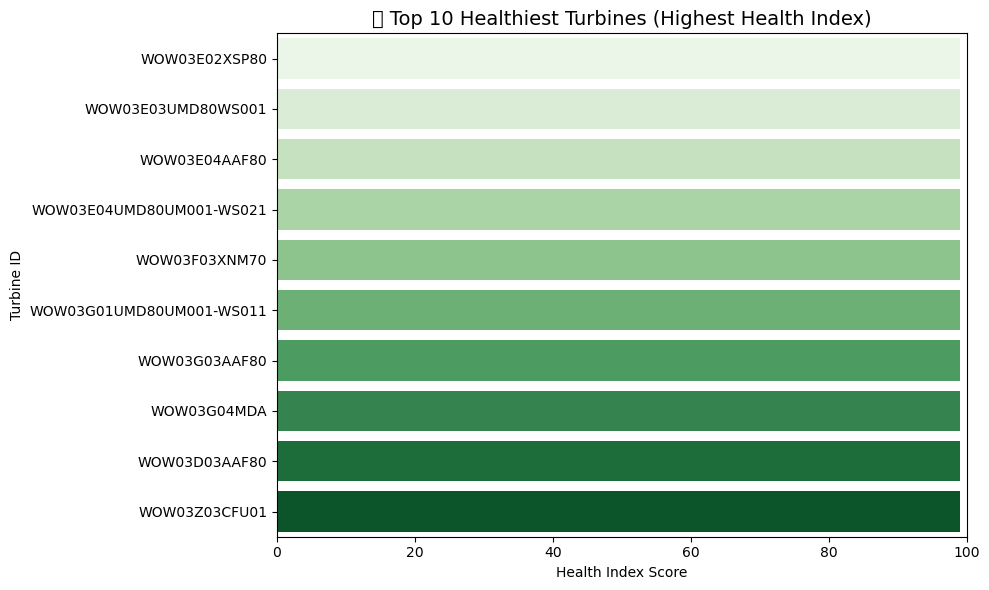

In [48]:
# Plot 2: Horizontal Barplot - Top 10 Healthiest Turbines
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom10, y='turbine_id', x='health_index_score', palette='Greens')
plt.title('🟢 Top 10 Healthiest Turbines (Highest Health Index)', fontsize=14)
plt.xlabel('Health Index Score')
plt.ylabel('Turbine ID')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

C:\Users\chinmay\AppData\Local\Temp\ipykernel_10396\1643960804.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\chinmay\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


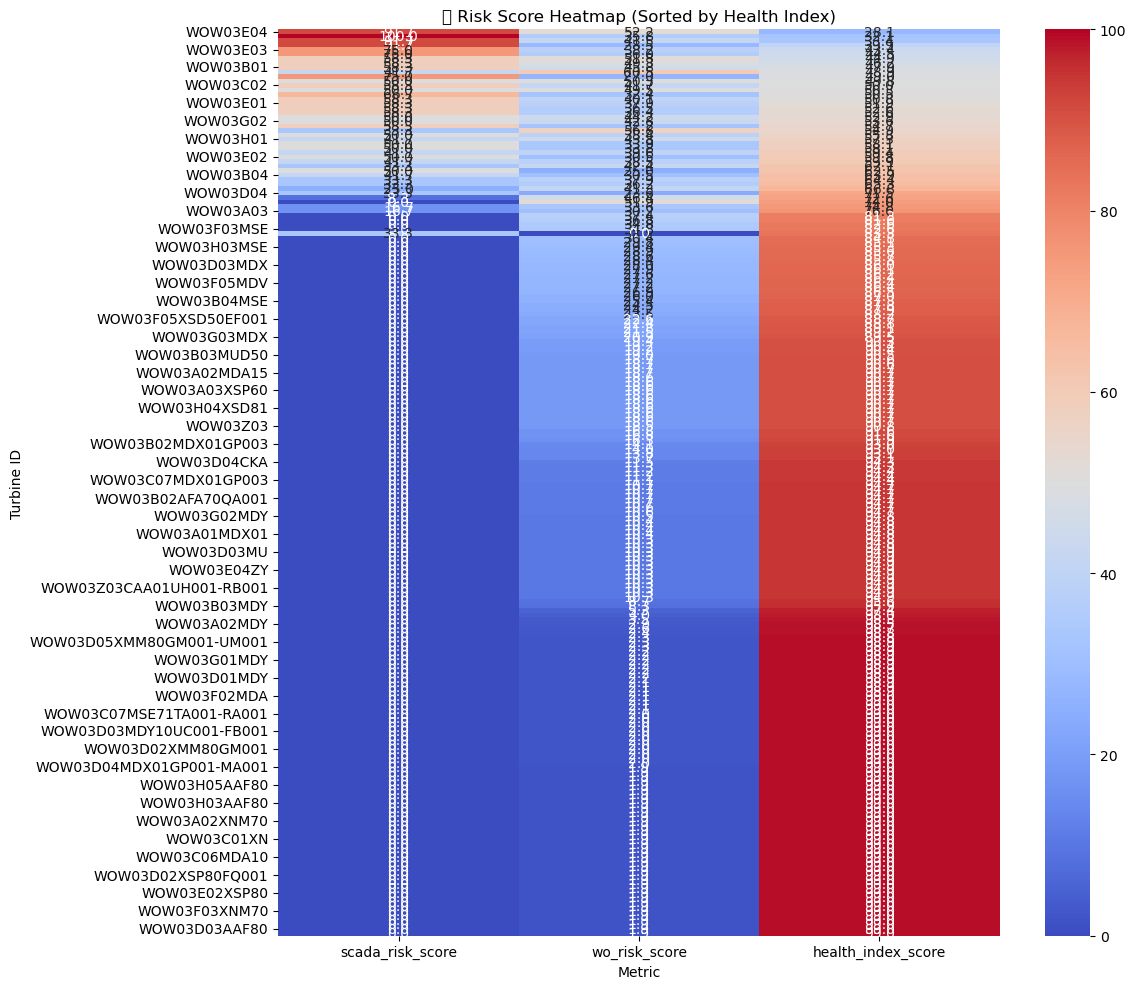

In [49]:
# Plot 3: Risk Score Heatmap
risk_matrix = combined.set_index('turbine_id')[['scada_risk_score', 'wo_risk_score', 'health_index_score']]

plt.figure(figsize=(12, 10))
sns.heatmap(risk_matrix.sort_values('health_index_score', ascending=True), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('📊 Risk Score Heatmap (Sorted by Health Index)')
plt.xlabel('Metric')
plt.ylabel('Turbine ID')
plt.tight_layout()
plt.show()

C:\Users\chinmay\AppData\Local\Temp\ipykernel_10396\2512330493.py:17: UserWarning: Glyph 129518 (\N{ABACUS}) missing from current font.
  plt.tight_layout()
C:\Users\chinmay\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129518 (\N{ABACUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


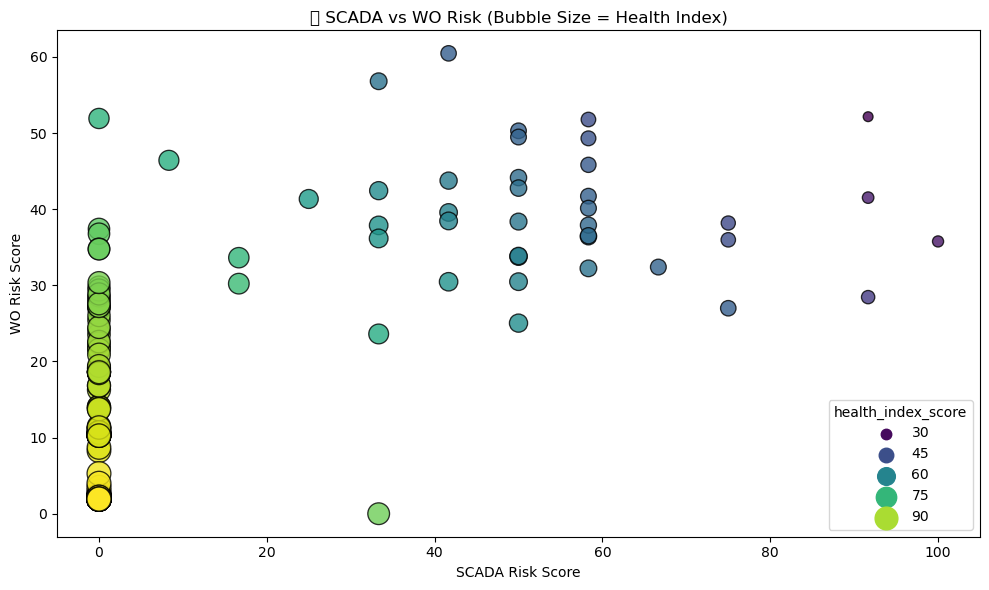

In [50]:

# Plot 4: SCADA vs WO Risk Bubble Chart
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=combined,
    x='scada_risk_score',
    y='wo_risk_score',
    size='health_index_score',
    hue='health_index_score',
    sizes=(50, 300),
    palette='viridis',
    alpha=0.8,
    edgecolor="black"
)
plt.title('🧮 SCADA vs WO Risk (Bubble Size = Health Index)')
plt.xlabel('SCADA Risk Score')
plt.ylabel('WO Risk Score')
plt.tight_layout()
plt.show()

## Work Order Prioritization Logic
To prioritize work orders effectively, we incorporate multiple dimensions beyond cost and count. The weighted scoring model includes:
- **Severity (1-5):** Impact level on asset performance
- **Failure Mode Criticality (1-5):** Based on historical failure consequence
- **Recurrence (1-5):** Frequency of similar failures
- **Lost Production Potential (1-5):** Downtime impact on power generation
- **Safety Risk (1-5):** Risk to personnel
- **Estimated Cost (normalized)**
- **Lead Time (in days, normalized)**

The total WO risk score is a weighted combination of the above factors.

In [51]:
print(wo_df.columns)

Index(['created_on', 'basic_start_date', 'basic_finish_date', 'order',
       'order_type', 'priority_text', 'system_status', 'user_status',
       'description', 'functional_location',
       'description_of_functional_location', 'total_planned_costs',
       'turbine_id', 'priority_score'],
      dtype='object')


In [52]:
# Ensure datetime format
wo_df['basic_start_date'] = pd.to_datetime(wo_df['basic_start_date'])
wo_df['basic_finish_date'] = pd.to_datetime(wo_df['basic_finish_date'])

# Calculate lead time
wo_df['lead_time_days'] = (wo_df['basic_finish_date'] - wo_df['basic_start_date']).dt.days

# Normalize cost and lead time
wo_df['normalized_cost'] = (wo_df['total_planned_costs'] - wo_df['total_planned_costs'].min()) / (wo_df['total_planned_costs'].max() - wo_df['total_planned_costs'].min())
wo_df['normalized_lead_time'] = (wo_df['lead_time_days'] - wo_df['lead_time_days'].min()) / (wo_df['lead_time_days'].max() - wo_df['lead_time_days'].min())

# Risk score using available data
wo_df['WO_risk_score'] = (
    wo_df['priority_score'] * 0.6 +
    wo_df['normalized_cost'] * 0.2 +
    wo_df['normalized_lead_time'] * 0.2
)


In [53]:
wo_df['basic_start_date'] 

0     2025-04-04
1     2025-03-06
2     2025-03-10
3     2025-03-13
4     2025-03-06
         ...    
788   2025-04-07
789   2025-09-08
790   2025-06-02
791   2025-07-07
792   2025-07-21
Name: basic_start_date, Length: 793, dtype: datetime64[ns]

In [54]:
wo_df['basic_finish_date']

0     2025-06-03
1     2025-03-06
2     2025-04-02
3     2025-04-03
4     2025-03-06
         ...    
788   2025-04-13
789   2025-09-14
790   2025-06-08
791   2025-07-13
792   2025-07-27
Name: basic_finish_date, Length: 793, dtype: datetime64[ns]

In [55]:
wo_df['lead_time_days']

0      60
1       0
2      23
3      21
4       0
       ..
788     6
789     6
790     6
791     6
792     6
Name: lead_time_days, Length: 793, dtype: int64

In [56]:
wo_df['normalized_cost']

0      0.004316
1      0.006279
2      0.006125
3      0.023479
4      0.012250
         ...   
788    0.000000
789    0.009648
790    0.009648
791    0.008167
792    0.012250
Name: normalized_cost, Length: 793, dtype: float64

In [57]:
wo_df['normalized_lead_time']

0      0.181818
1      0.000000
2      0.069697
3      0.063636
4      0.000000
         ...   
788    0.018182
789    0.018182
790    0.018182
791    0.018182
792    0.018182
Name: normalized_lead_time, Length: 793, dtype: float64

In [58]:
wo_df['WO_risk_score']

0      0.637227
1      1.201256
2      1.215164
3      1.217423
4      1.802450
         ...   
788    0.003636
789    0.005566
790    0.005566
791    0.005270
792    0.006086
Name: WO_risk_score, Length: 793, dtype: float64

## Data Understanding & Feature Engineering
We can leverage multiple data sources to assess asset health:
- **SCADA:** Sensor data (e.g., temperature, pressure). Feature engineering includes:
  - Rolling means/variances
  - Anomaly detection using thresholds or ML
- **CMMS (WO data):** Frequency and type of failures
- **Vibration Sensors:** Harmonic signatures for bearing faults
- **Alarm Logs:** Frequency and type of alarms
- **Maintenance Logs:** Previous repairs and effectiveness

Useful features:
- Time since last failure
- Time to failure (MTBF)
- Frequency of anomalies per asset

## Dynamic Health Index
To make the Health Index dynamic:
- **Time Decay:** Older events have less weight
- **Weighted Updates:** Critical failures impact the index more than minor issues
- **Feedback Loops:** Completed maintenance can improve the score

Implementation example (conceptual):
```python
HI = α * Current_Score + β * New_Events - γ * Resolved_Issues
```
Where:
- α, β, γ are tunable decay/weighting constants
- Resolved issues (e.g., successful maintenance) reduce the overall risk

## Assumptions & Limitations
- Sensor thresholds are reliable and standardized
- Data is complete and up-to-date
- Equal weighting may not reflect true risk impact (tunable)
- Historical failure mode criticality is based on limited records

**Data Quality Issues:**
- Missing or erroneous data
- Sensor drift or calibration errors
- Inconsistent WO descriptions

**Mitigation:**
- Data imputation
- Anomaly detection on sensor data
- NLP for work order standardization

## Decision-Making & Action Plan
The scores drive prioritization by:
- Scheduling immediate inspections for turbines with **Health Index > 80**
- **High WO Risk** WOs are resolved within 7 days
- **Medium Risk** WOs scheduled based on resource availability

**Resource Allocation:**
- Teams dispatched to turbines with highest cumulative risk
- Budget assigned to high-cost, high-impact failures

**Example Rules:**
```python
if WO_risk_score > 4.5:
    schedule_urgent_repair()
elif Health_Index > 80:
    trigger_inspection()
```

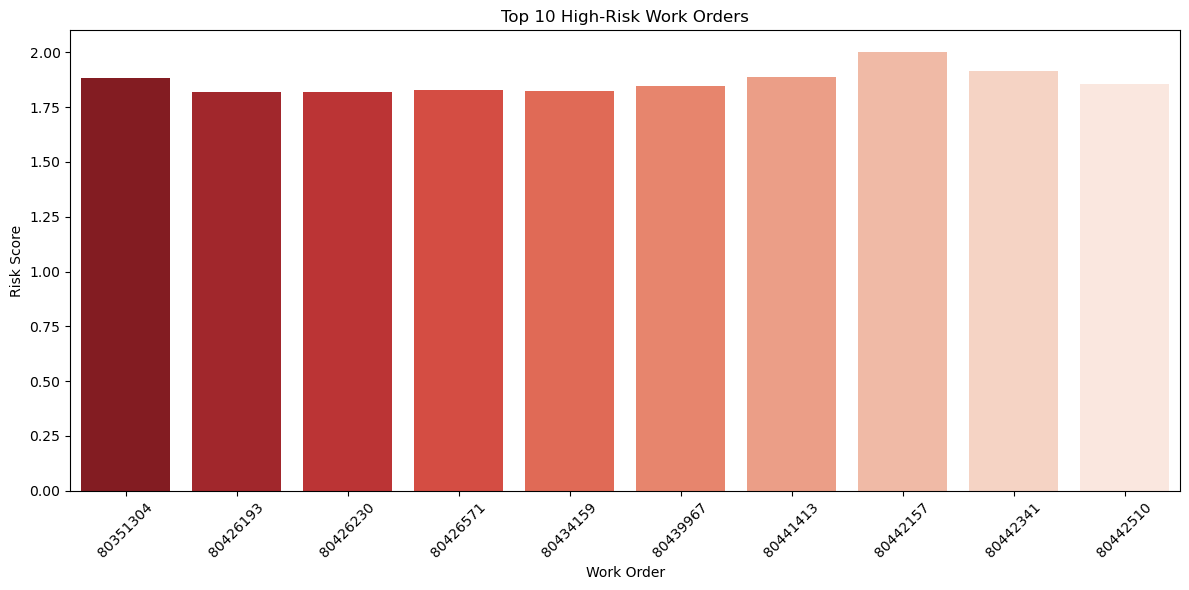

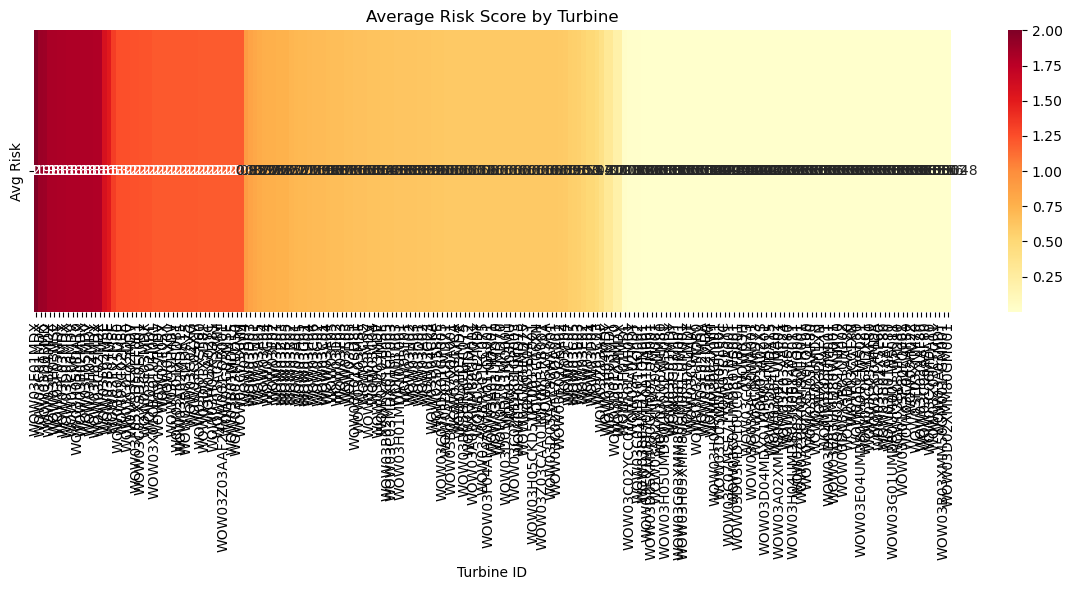

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recalculate lead time and risk score (if needed)
wo_df['basic_start_date'] = pd.to_datetime(wo_df['basic_start_date'])
wo_df['basic_finish_date'] = pd.to_datetime(wo_df['basic_finish_date'])
wo_df['lead_time_days'] = (wo_df['basic_finish_date'] - wo_df['basic_start_date']).dt.days

wo_df['normalized_cost'] = (wo_df['total_planned_costs'] - wo_df['total_planned_costs'].min()) / (wo_df['total_planned_costs'].max() - wo_df['total_planned_costs'].min())
wo_df['normalized_lead_time'] = (wo_df['lead_time_days'] - wo_df['lead_time_days'].min()) / (wo_df['lead_time_days'].max() - wo_df['lead_time_days'].min())

wo_df['WO_risk_score'] = (
    wo_df['priority_score'] * 0.6 +
    wo_df['normalized_cost'] * 0.2 +
    wo_df['normalized_lead_time'] * 0.2
)

# Bar chart for top 10 high-risk WOs
top_wos = wo_df.sort_values(by='WO_risk_score', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_wos, x='order', y='WO_risk_score', palette='Reds_r')
plt.title("Top 10 High-Risk Work Orders")
plt.xticks(rotation=45)
plt.xlabel("Work Order")
plt.ylabel("Risk Score")
plt.tight_layout()
plt.show()

# Optional: Heatmap of turbine risk (if turbine_id is available)
turbine_risk = wo_df.groupby('turbine_id')['WO_risk_score'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.heatmap([turbine_risk['WO_risk_score']], cmap="YlOrRd", annot=True, cbar=True, xticklabels=turbine_risk['turbine_id'], yticklabels=["Avg Risk"])
plt.title("Average Risk Score by Turbine")
plt.xlabel("Turbine ID")
plt.tight_layout()
plt.show()


In [60]:
# Recalculate WO risk score if needed
wo_df['lead_time_days'] = (wo_df['basic_finish_date'] - wo_df['basic_start_date']).dt.days
wo_df['normalized_cost'] = (wo_df['total_planned_costs'] - wo_df['total_planned_costs'].min()) / (wo_df['total_planned_costs'].max() - wo_df['total_planned_costs'].min())
wo_df['normalized_lead_time'] = (wo_df['lead_time_days'] - wo_df['lead_time_days'].min()) / (wo_df['lead_time_days'].max() - wo_df['lead_time_days'].min())

wo_df['WO_risk_score'] = (
    wo_df['priority_score'] * 0.6 +
    wo_df['normalized_cost'] * 0.2 +
    wo_df['normalized_lead_time'] * 0.2
)

# ✅ Identify top unique high-risk work orders (averaged across duplicates)
top_orders = (
    wo_df.groupby('order')['WO_risk_score']
    .mean()
    .sort_values(ascending=False)
    .head(3)
    .index.tolist()
)

# ✅ Remove all rows that belong to those high-risk orders
resolved_df = wo_df[~wo_df['order'].isin(top_orders)]

# ✅ Compare average scores
health_before = wo_df['WO_risk_score'].mean()
health_after = resolved_df['WO_risk_score'].mean()

print(f"Average Risk Score Before Resolution: {health_before:.4f}")
print(f"Average Risk Score After Resolving Top 3 High-Risk WOs: {health_after:.4f}")


Average Risk Score Before Resolution: 0.6531
Average Risk Score After Resolving Top 3 High-Risk WOs: 0.6482


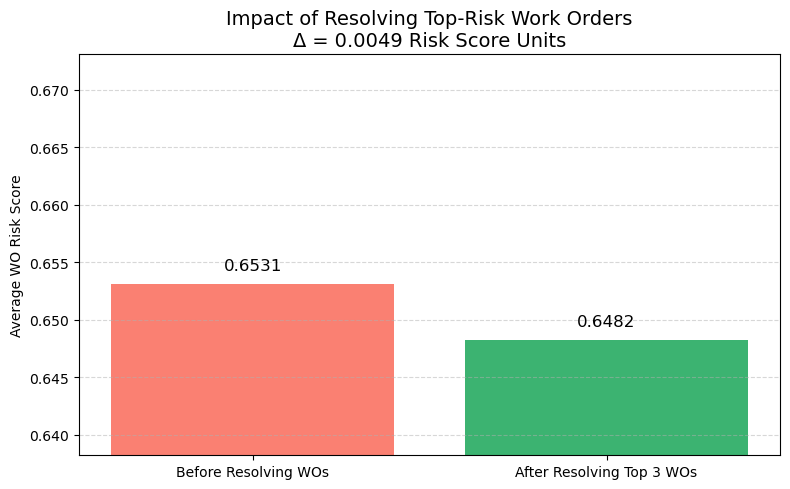

In [61]:
import matplotlib.pyplot as plt

# Labels and values
labels = ['Before Resolving WOs', 'After Resolving Top 3 WOs']
scores = [health_before, health_after]
delta = scores[0] - scores[1]

# Bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, scores, color=['salmon', 'mediumseagreen'])

# Annotate bars
for i, score in enumerate(scores):
    plt.text(i, score + 0.001, f"{score:.4f}", ha='center', va='bottom', fontsize=12)

# Add delta info
plt.title(f"Impact of Resolving Top-Risk Work Orders\nΔ = {delta:.4f} Risk Score Units", fontsize=14)
plt.ylabel("Average WO Risk Score")
plt.ylim(min(scores) - 0.01, max(scores) + 0.02)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [62]:
# Step 1: Compute SCADA Anomaly Score per Turbine

# Define failure thresholds
thresholds = {
    "gearbox_temperature_C": 75,
    "nacelle_temperature_C": 60,
    "hydraulic_pressure_bar": 250,
    "cooling_pressure_bar": 200
}

# Count how often each turbine exceeds any threshold
def compute_anomaly_score(df, thresholds):
    df = df.copy()
    for col, threshold in thresholds.items():
        df[f"{col}_exceed"] = df[col] > threshold
    exceed_cols = [f"{col}_exceed" for col in thresholds]
    df["anomaly_count"] = df[exceed_cols].sum(axis=1)
    return df

scada_df_scored = compute_anomaly_score(scada_df, thresholds)

# Aggregate anomaly score per turbine
scada_anomaly_score = scada_df_scored.groupby("turbine_id")["anomaly_count"].sum().reset_index()
scada_anomaly_score.rename(columns={"anomaly_count": "scada_risk_score"}, inplace=True)

# Normalize to 0-100
scada_anomaly_score["scada_risk_score_norm"] = (
    100 * scada_anomaly_score["scada_risk_score"] / scada_anomaly_score["scada_risk_score"].max()
)

scada_anomaly_score.head()


,turbine_id,scada_risk_score,scada_risk_score_norm
0,WOW03A01,4,33.333333
1,WOW03A02,9,75.000000
2,WOW03A03,2,16.666667
3,WOW03A04,2,16.666667
4,WOW03A05,8,66.666667


In [63]:
print(wo_df.columns.tolist())

['created_on', 'basic_start_date', 'basic_finish_date', 'order', 'order_type', 'priority_text', 'system_status', 'user_status', 'description', 'functional_location', 'description_of_functional_location', 'total_planned_costs', 'turbine_id', 'priority_score', 'lead_time_days', 'normalized_cost', 'normalized_lead_time', 'WO_risk_score']


In [64]:
# Map priority to weights
priority_weights = {
    "Immediately": 100,
    "Within 1 month": 70,
    "Within 3 months": 40
}

# Clean and prepare
wo_df_clean = wo_df.copy()
wo_df_clean = wo_df_clean[wo_df_clean["functional_location"].str.startswith("WOW")]
wo_df_clean["turbine_id"] = wo_df_clean["functional_location"].str.strip()
wo_df_clean["priority_score"] = wo_df_clean["priority_text"].map(priority_weights).fillna(30)

# Calculate weighted work order score
wo_df_clean["wo_score"] = wo_df_clean["priority_score"] * wo_df_clean["total_planned_costs"]

# Aggregate per turbine
wo_agg = wo_df_clean.groupby("turbine_id").agg({
    "wo_score": "sum",
    "order": "count"
}).reset_index().rename(columns={"Order": "wo_count"})

# Normalize score
wo_agg["wo_score_norm"] = 100 * wo_agg["wo_score"] / wo_agg["wo_score"].max()
wo_agg.head()


,turbine_id,wo_score,order,wo_score_norm
0,WOW03A01,15006820.0,25,46.422421
1,WOW03A01MDX01,52800.0,1,0.163333
2,WOW03A01XMM,0.0,1,0.000000
3,WOW03A02,7479531.5,14,23.137344
4,WOW03A02MDA15,69120.8,1,0.213820


In [65]:
# Assume SCADA = 60%, WO = 40%
scada_scores = scada_anomaly_score[["turbine_id", "scada_risk_score_norm"]]
wo_scores = wo_agg[["turbine_id", "wo_score_norm"]]

# Merge
health_df = pd.merge(scada_scores, wo_scores, on="turbine_id", how="outer").fillna(0)

# Calculate Health Index Score
health_df["health_index_score"] = (
    0.6 * health_df["scada_risk_score_norm"] + 0.4 * health_df["wo_score_norm"]
)

# Round for presentation
health_df["health_index_score"] = health_df["health_index_score"].round(2)

# Sort descending (highest risk first)
health_df_sorted = health_df.sort_values(by="health_index_score", ascending=False)

# Display top 10
health_df_sorted.head(10)


,turbine_id,scada_risk_score_norm,wo_score_norm,health_index_score
26,WOW03E04,91.666667,77.494297,86.00
6,WOW03B02,100.000000,38.153299,75.26
32,WOW03G01,91.666667,44.132927,72.65
35,WOW03G04,91.666667,21.314501,63.53
11,WOW03C01,41.666667,84.506255,58.80
20,WOW03D03,58.333333,54.726587,56.89
30,WOW03F04,58.333333,51.750448,55.70
1,WOW03A02,75.000000,23.137344,54.25
5,WOW03B01,58.333333,45.892492,53.36
36,WOW03H01,41.666667,70.218093,53.09


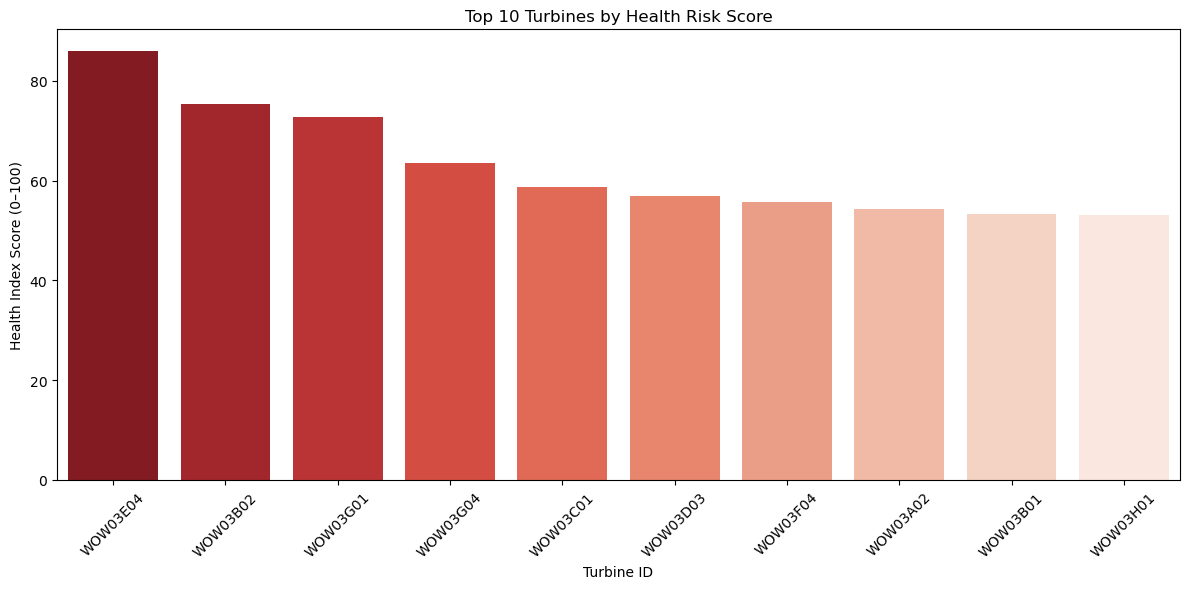

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure
plt.figure(figsize=(12, 6))
top_10 = health_df_sorted.head(10)

# Plot
sns.barplot(
    data=top_10,
    x="turbine_id",
    y="health_index_score",
    palette="Reds_r"
)
plt.title("Top 10 Turbines by Health Risk Score")
plt.ylabel("Health Index Score (0–100)")
plt.xlabel("Turbine ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


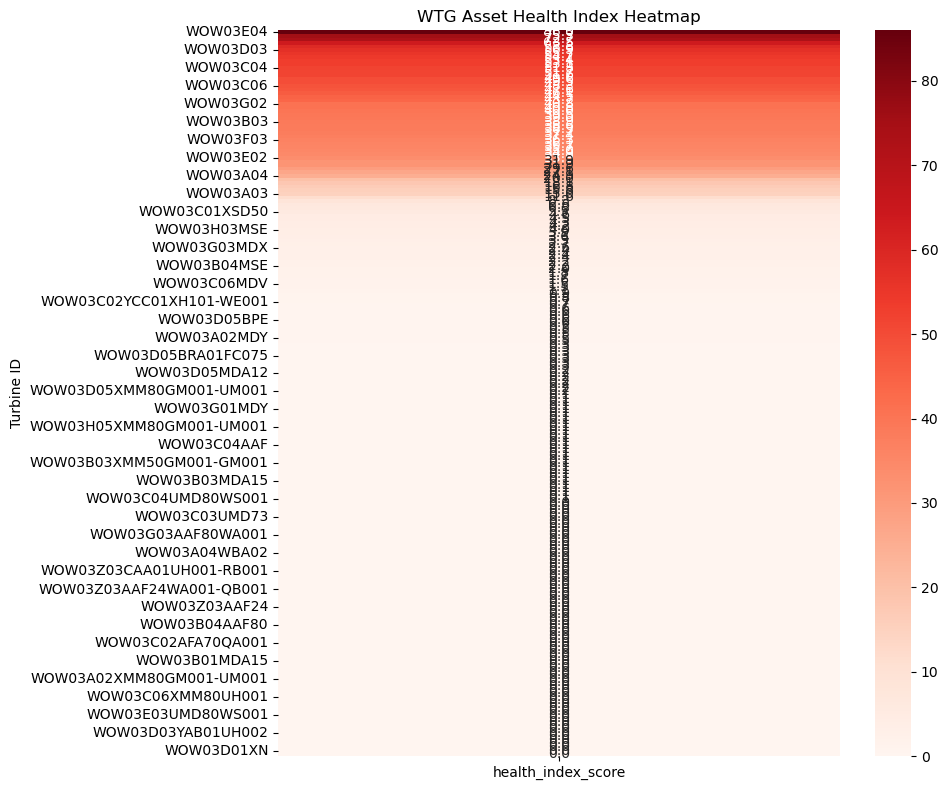

In [67]:
# Convert to matrix format for heatmap (if more turbines exist)
plt.figure(figsize=(10, 8))
heatmap_data = health_df_sorted.set_index("turbine_id")[["health_index_score"]]

sns.heatmap(heatmap_data, annot=True, cmap="Reds", fmt=".1f")
plt.title("WTG Asset Health Index Heatmap")
plt.ylabel("Turbine ID")
plt.tight_layout()
plt.show()


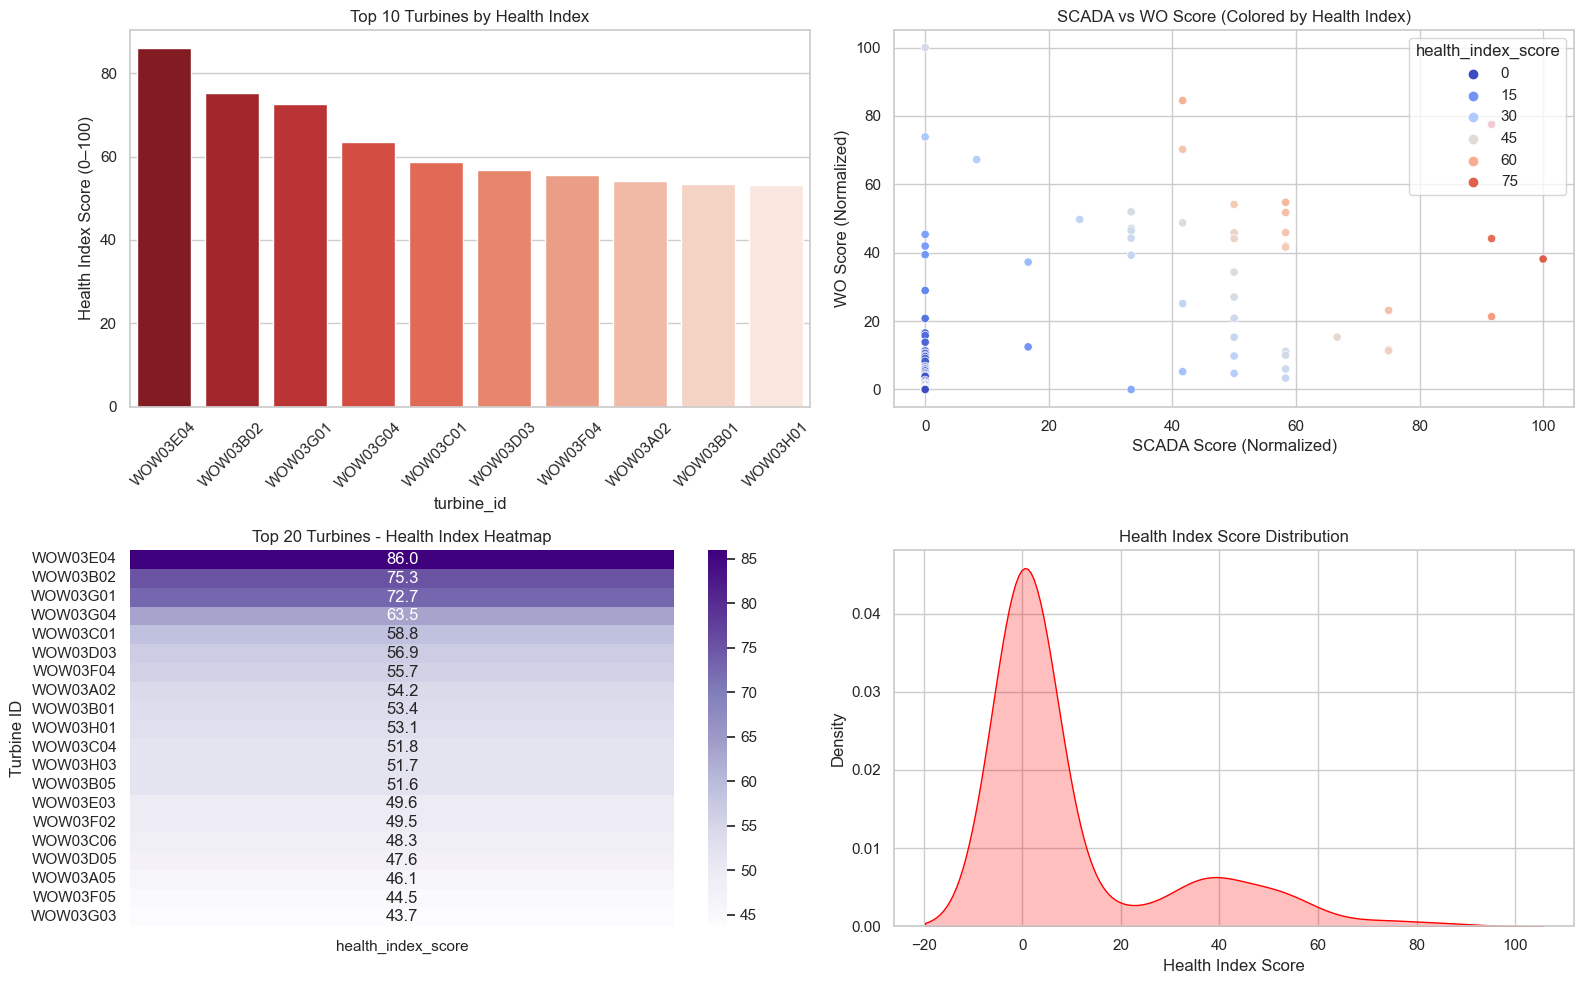

In [68]:
# Ensure clean aesthetics
sns.set(style="whitegrid")

# Select top turbines
top_turbines = health_df_sorted.head(10).copy()

# Create subplots layout
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Barplot - Top 10 Turbines by Health Index
sns.barplot(data=top_turbines, x="turbine_id", y="health_index_score", ax=axes[0, 0], palette="Reds_r")
axes[0, 0].set_title("Top 10 Turbines by Health Index")
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylabel("Health Index Score (0–100)")

# 2. Scatter Plot - SCADA vs WO Scores
sns.scatterplot(
    data=health_df_sorted,
    x="scada_risk_score_norm",
    y="wo_score_norm",
    hue="health_index_score",
    palette="coolwarm",
    ax=axes[0, 1]
)
axes[0, 1].set_title("SCADA vs WO Score (Colored by Health Index)")
axes[0, 1].set_xlabel("SCADA Score (Normalized)")
axes[0, 1].set_ylabel("WO Score (Normalized)")

# 3. Heatmap - Top 20 Turbines by Risk
heatmap_data = health_df_sorted.set_index("turbine_id")[["health_index_score"]]
sns.heatmap(heatmap_data.head(20), annot=True, cmap="Purples", fmt=".1f", ax=axes[1, 0])
axes[1, 0].set_title("Top 20 Turbines - Health Index Heatmap")
axes[1, 0].set_xlabel("")
axes[1, 0].set_ylabel("Turbine ID")

# 4. KDE Plot - Distribution of Health Scores
sns.kdeplot(data=health_df_sorted["health_index_score"], fill=True, color="red", ax=axes[1, 1])
axes[1, 1].set_title("Health Index Score Distribution")
axes[1, 1].set_xlabel("Health Index Score")
axes[1, 1].set_ylabel("Density")

plt.tight_layout()
plt.show()

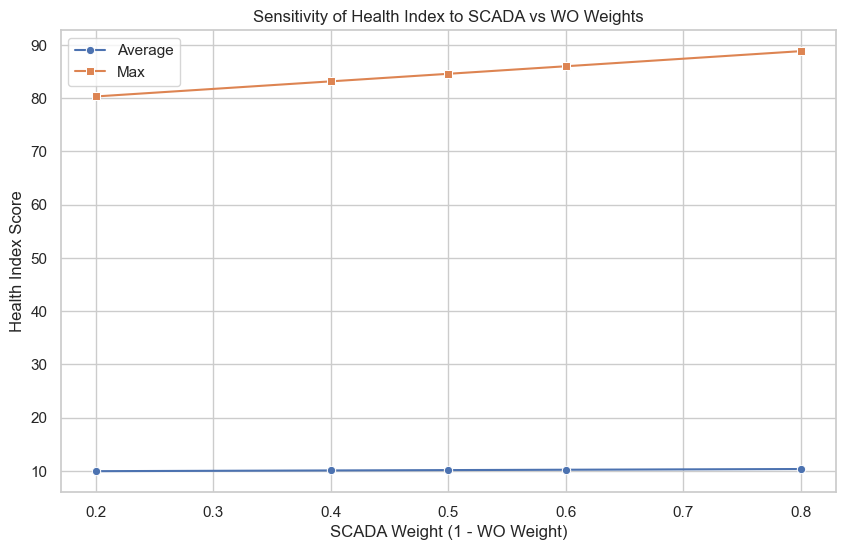

,SCADA Weight,WO Weight,Average Health Index,Max Health Index
0,0.2,0.8,9.937766,80.328771
1,0.4,0.6,10.072962,83.163245
2,0.5,0.5,10.140559,84.580482
3,0.6,0.4,10.208157,85.997719
4,0.8,0.2,10.343352,88.832193


In [69]:
# List of different SCADA/WO weight combinations to test
weight_scenarios = [
    (0.2, 0.8),
    (0.4, 0.6),
    (0.5, 0.5),
    (0.6, 0.4),
    (0.8, 0.2)
]

# Collect results
sensitivity_results = []

for scada_w, wo_w in weight_scenarios:
    # Recalculate health index for each weight combination
    health_df["health_index_score"] = (
        scada_w * health_df["scada_risk_score_norm"] +
        wo_w * health_df["wo_score_norm"]
    )
    avg_score = health_df["health_index_score"].mean()
    max_score = health_df["health_index_score"].max()
    sensitivity_results.append({
        "SCADA Weight": scada_w,
        "WO Weight": wo_w,
        "Average Health Index": avg_score,
        "Max Health Index": max_score
    })

# Convert to DataFrame
sensitivity_df = pd.DataFrame(sensitivity_results)

# Plot sensitivity trend
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=sensitivity_df, x="SCADA Weight", y="Average Health Index", marker="o", label="Average")
sns.lineplot(data=sensitivity_df, x="SCADA Weight", y="Max Health Index", marker="s", label="Max")
plt.title("Sensitivity of Health Index to SCADA vs WO Weights")
plt.ylabel("Health Index Score")
plt.xlabel("SCADA Weight (1 - WO Weight)")
plt.legend()
plt.grid(True)
plt.show()

# Also show data
sensitivity_df


In [71]:
!jupyter nbconvert --to html "Offshore Wind Turbine Health Index and Work Order Prioritization.ipynb"


[NbConvertApp] Converting notebook Offshore Wind Turbine Health Index and Work Order Prioritization.ipynb to html
[NbConvertApp] Writing 2871301 bytes to Offshore Wind Turbine Health Index and Work Order Prioritization.html
